In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, GRU
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv(r'C:\Users\g.davoulos\Downloads\Dataset2\DogMoveData_csv_format_2\DogMoveData_merged_2.csv')


In [3]:
X = data.drop('Behavior', axis=1)
y = data['Behavior']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the input features
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_test.mean()) / X_test.std()

# Reshape input data for RNN
timesteps = 1
X_train_reshaped = X_train_normalized.values.reshape(-1, timesteps, X_train.shape[1])
X_test_reshaped = X_test_normalized.values.reshape(-1, timesteps, X_test.shape[1])

y_train_onehot = np_utils.to_categorical(y_train, num_classes)

# Build the RNN model with reduced complexity and L2 regularization
model = Sequential()

model.add(LSTM(64, input_shape=(timesteps, X_train.shape[1]), return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train_onehot, epochs=10, batch_size=256, validation_split=0.1, callbacks=[early_stopping], verbose=1)


C:\Users\g.davoulos\anaconda3\envs\Env_Python_310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
16976/16976 [==============================] - 165s 9ms/step - loss: 0.6782 - accuracy: 0.7677 - val_loss: 0.4547 - val_accuracy: 0.8406
Epoch 2/10
16976/16976 [==============================] - 156s 9ms/step - loss: 0.4462 - accuracy: 0.8463 - val_loss: 0.3985 - val_accuracy: 0.8604
Epoch 3/10
16976/16976 [==============================] - 181s 11ms/step - loss: 0.3495 - accuracy: 0.8848 - val_loss: 0.3203 - val_accuracy: 0.8933
Epoch 6/10
 6942/16976 [===========>..................] - ETA: 1:38 - loss: 0.3347 - accuracy: 0.8917

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



16976/16976 [==============================] - 178s 10ms/step - loss: 0.2915 - accuracy: 0.9116 - val_loss: 0.2669 - val_accuracy: 0.9174
Epoch 9/10
16976/16976 [==============================] - 166s 10ms/step - loss: 0.2767 - accuracy: 0.9170 - val_loss: 0.2540 - val_accuracy: 0.9217
Epoch 10/10
16976/16976 [==============================] - 166s 10ms/step - loss: 0.2638 - accuracy: 0.9217 - val_loss: 0.2420 - val_accuracy: 0.9271


In [4]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test_reshaped, np_utils.to_categorical(y_test, num_classes), verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2434
Test Accuracy: 0.9263


37724/37724 [==============================] - 115s 3ms/step


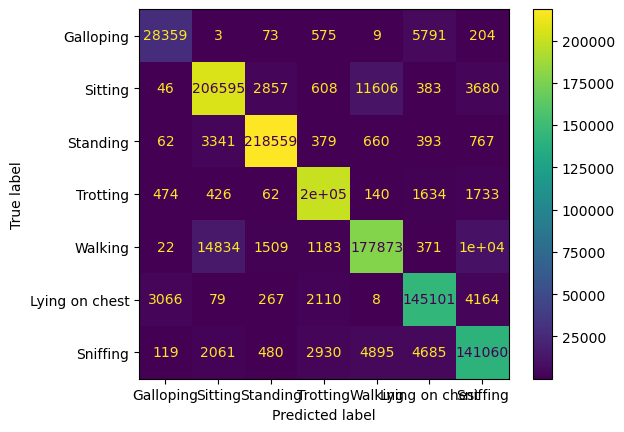

                precision    recall  f1-score   support

     Galloping       0.88      0.81      0.84     35014
       Sitting       0.91      0.92      0.91    225775
      Standing       0.98      0.98      0.98    224161
      Trotting       0.96      0.98      0.97    205077
       Walking       0.91      0.86      0.89    206098
Lying on chest       0.92      0.94      0.93    154795
      Sniffing       0.87      0.90      0.89    156230

      accuracy                           0.93   1207150
     macro avg       0.92      0.91      0.91   1207150
  weighted avg       0.93      0.93      0.93   1207150



In [6]:
 # Predict labels on the test data
y_pred_prob = model.predict(X_test_reshaped)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(np_utils.to_categorical(y_test, num_classes), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking','Lying on chest', 'Sniffing'])
disp.plot()
plt.show()

# Print classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking','Lying on chest', 'Sniffing']))